In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

### Preconditionning std Laplacian with q=0.001

In [47]:
n = 100
p = 0.9
eta = 0.

rng = Random.default_rng()
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.001
n_batch = 6
n_rep = 10
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng)

Dict{Any, Any} with 6 entries:
  "DPP unif" => Dict{String, Any}("sp_L_std"=>[52.1349; 175.172; … ; 160.103; 1…
  "iid LS"   => Dict{String, Any}("sp_L_std"=>[84.2035; 174.221; … ; 212.405; 1…
  "UST unif" => Dict{String, Any}("sp_L_std"=>[43.7193; 195.992; … ; 148.29; 10…
  "iid unif" => Dict{String, Any}("sp_L_std"=>[74.8839; 202.026; … ; 205.937; 1…
  "DPP LS"   => Dict{String, Any}("sp_L_std"=>[28.973; 207.225; … ; 178.758; 19…
  "UST LS"   => Dict{String, Any}("sp_L_std"=>[59.4078; 133.112; … ; 168.725; 1…

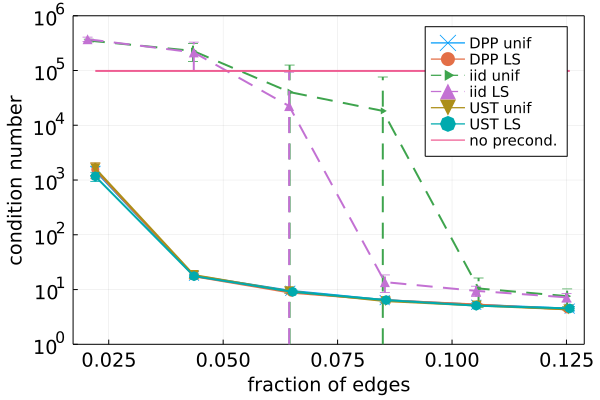

In [50]:
y_limits = (1,1e6)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

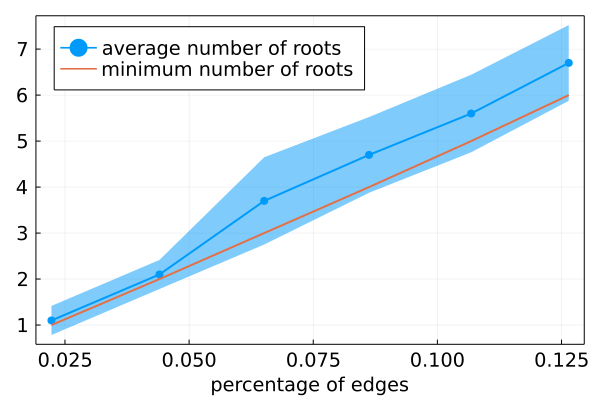

In [27]:
method = "DPP unif"
plot_nb_roots(D_all, method; legendposition=:topleft)

In [44]:
n = 100
p = 0.9
eta = 0.

rng = Random.default_rng()
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.1
n_batch = 6
n_rep = 10
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng)

Dict{Any, Any} with 6 entries:
  "DPP unif" => Dict{String, Any}("sp_L_std"=>[74.7842; 81.9298; … ; 201.262; 1…
  "iid LS"   => Dict{String, Any}("sp_L_std"=>[71.143; 150.816; … ; 107.286; 19…
  "UST unif" => Dict{String, Any}("sp_L_std"=>[62.6706; 189.85; … ; 179.649; 14…
  "iid unif" => Dict{String, Any}("sp_L_std"=>[101.879; 195.905; … ; 159.127; 1…
  "DPP LS"   => Dict{String, Any}("sp_L_std"=>[50.4104; 189.767; … ; 198.558; 1…
  "UST LS"   => Dict{String, Any}("sp_L_std"=>[103.397; 235.01; … ; 143.666; 10…

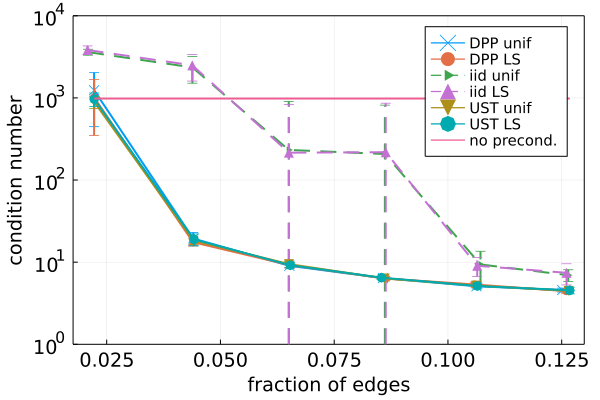

In [45]:
y_limits = (1,1e4)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

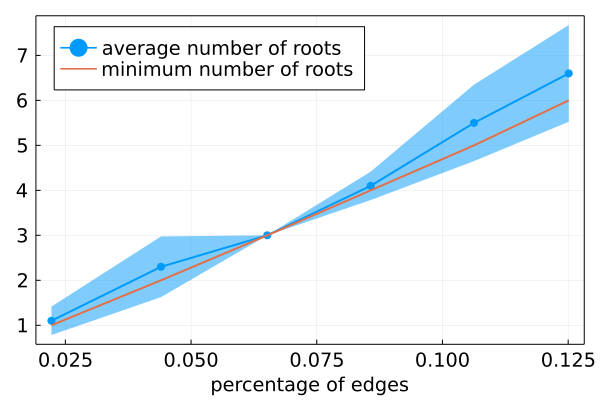

In [46]:
method = "DPP unif"
plot_nb_roots(D_all, method; legendposition=:topleft)

In [57]:
# SBM
q = 0.1
c = [20 10;
10 20]
n = [100 ; 100]
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

n_batch = 6
n_rep = 5
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng)


Dict{Any, Any} with 6 entries:
  "DPP unif" => Dict{String, Any}("sp_L_std"=>[182.097; 468.915; … ; 438.447; 2…
  "iid LS"   => Dict{String, Any}("sp_L_std"=>[375.443; 570.724; … ; 505.742; 5…
  "UST unif" => Dict{String, Any}("sp_L_std"=>[132.718; 359.863; … ; 412.396; 4…
  "iid unif" => Dict{String, Any}("sp_L_std"=>[155.119; 750.386; … ; 395.348; 3…
  "DPP LS"   => Dict{String, Any}("sp_L_std"=>[68.6025; 333.05; … ; 658.217; 48…
  "UST LS"   => Dict{String, Any}("sp_L_std"=>[124.172; 303.868; … ; 563.323; 2…

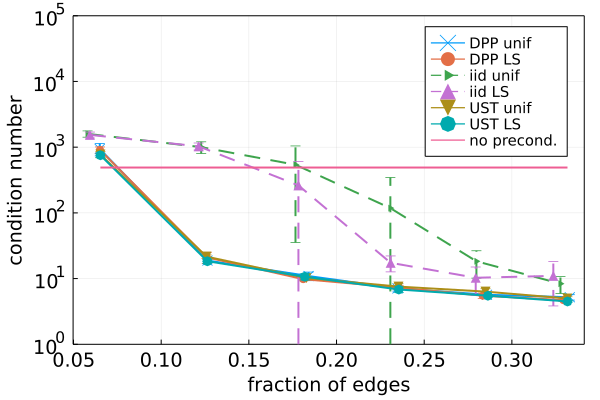

In [58]:
y_limits = (1,1e5)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

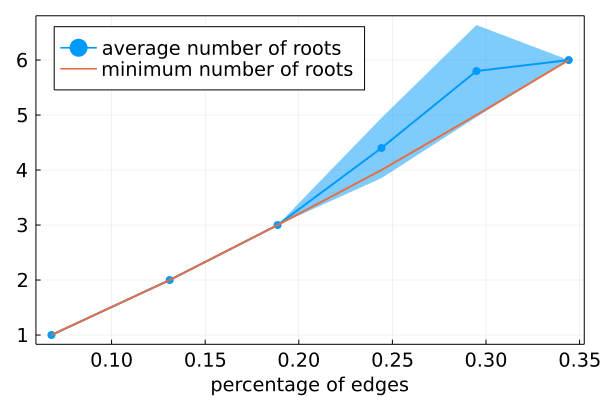

In [56]:
method = "DPP unif"
plot_nb_roots(D_all, method; legendposition=:topleft)

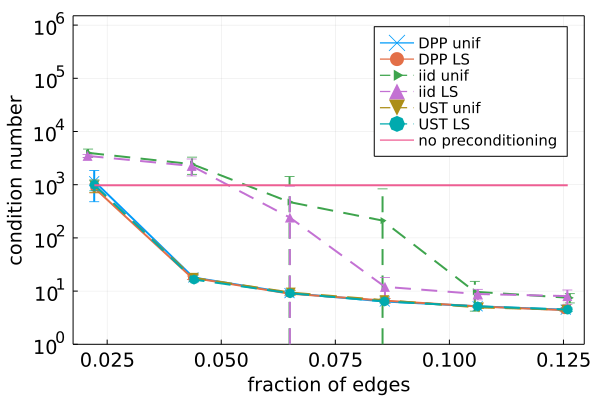

In [32]:
method = "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot(x,y,
yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13),
linewidth=2,
markerstrokewidth=2)

method =  "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "iid unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "UST unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:dtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "UST LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:octagon,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
linewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm,
markerstrokewidth=2)

ylims!((1e0,1.5*1e6))
yticks!([1,1e1,1e2,1e3,1e4,1e5,1e6])

# foldername = "figures/"
# type = "precond"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
# savefig(foldername*name)

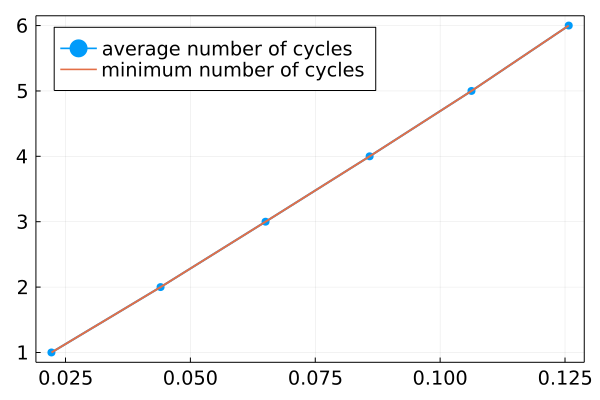

In [17]:
method = "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["roots"]
y_err = D["roots_std"]

legendposition=:topleft
plot(x,y,ribbon=y_err,labels="average number of roots",
markersize=5,
markershape=:circle, 
markerstrokecolor=:auto,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13),
ytickfont=font(13),
guidefont=font(13),
legendfont=font(13),
framestyle=:box,
margins=0.1 * 2cm)
# baseline
plot!(x,1:n_batch,linewidth=2,labels="minimum number of roots",legend=legendposition)

### Preconditionning std Laplacian with q=0.1

In [18]:
n = 100
p = 0.9
eta = 0.

mm = Length(:mm, 1)

rng = Random.default_rng();
meta_g = gen_graph_mun(rng, n, p, eta);
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.1
D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng);


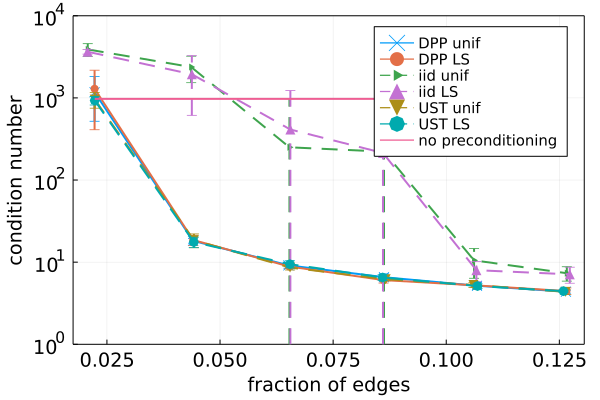

In [19]:

method = "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]


plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2)


method = "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "iid unif"
D = D_all[method]
x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]


plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]


plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)


method = "UST unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:dtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "UST LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:octagon,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10, 
framestyle = :box,
margins = 0.1*2Plots.cm,
linewidth=2,
markerstrokewidth=2)
ylims!((1e0,1e4))

# foldername = "figures/"
# type = "precond"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
# savefig(foldername*name)

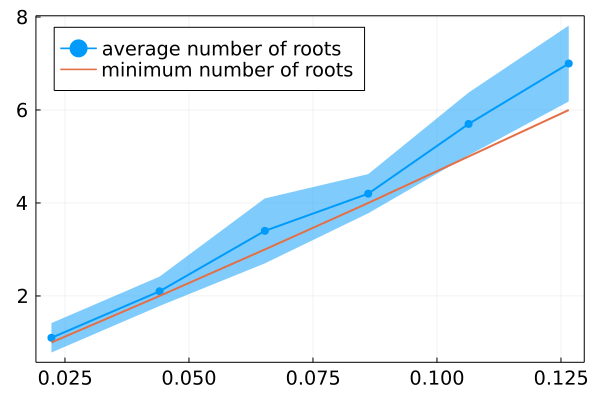

In [20]:
method = "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["roots"]
y_err = D["roots_std"]

legendposition=:topleft
plot(x,y,ribbon=y_err,labels="average number of roots",
markersize=5,
markershape=:circle, 
markerstrokecolor=:auto,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13),
ytickfont=font(13),
guidefont=font(13),
legendfont=font(13),
framestyle=:box,
margins=0.1 * 2cm)
# baseline
plot!(x,1:n_batch,linewidth=2,labels="minimum number of roots",legend=legendposition)

## Same graph but with non-trivial bundle

In [14]:
q = 0.1;

n = 100
p = 0.9
eta = 0.1
meta_g = gen_graph_mun(rng, n, p, eta);

D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng);

In [15]:
q = 0.001;

n = 100
p = 0.9
eta = 0.1
meta_g = gen_graph_mun(rng, n, p, eta);

D = cond_numbers(meta_g,q,n_tot,n_rep,rng);

### SBM

In [25]:
c = [50 10;
10 50]
n = [100 ; 100]
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.001;
D = cond_numbers(meta_g,q,n_tot,n_rep,rng);